In [1]:
#LOAN APPROVAL PREDICTION

In [2]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app_data = pd.read_csv(r"C:\Users\navbh\OneDrive\Documents/application_record.csv")
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record= pd.read_csv(r"C:\Users\navbh\OneDrive\Documents/credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
#To check the rows of the tables.

In [6]:
len(app_data)

438557

In [7]:
len(credit_record)

1048575

In [8]:
 #To check the rows and columns of the table

In [9]:
app_data.shape

(438557, 18)

In [10]:
credit_record.shape

(1048575, 3)

In [11]:
#To check the unique IDs

In [12]:
print("Number of unique IDs in app_data:", len(app_data.ID.unique()))
print("Number of unique IDs in credit_record:", len(credit_record.ID.unique()))

Number of unique IDs in app_data: 438510
Number of unique IDs in credit_record: 45985


In [13]:
#To show datatypes and null counts

In [14]:
app_data.info(), credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

(None, None)

In [15]:
#To show column names only

In [16]:
app_data.columns, credit_record.columns

(Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
       dtype='object'),
 Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object'))

In [17]:
#To show the frequency count for the columns

In [18]:
app_data.value_counts(), credit_record.value_counts()

(ID       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS
 5008806  M            Y             Y                0             112500.0          Working               Secondary / secondary special  Married             House / apartment  -21474      -1134          1           0                0           0           Security staff   2.0                1
 6268730  M            Y             Y                0             225000.0          Commercial associate  Secondary / secondary special  Married             House / apartment  -12339      -1889          1           0                0           0           Drivers          2.0                1
 6268724  F            Y             Y                0             337500.0          Working               Secondary

In [19]:
#To show numerical summary like mean,std, count

In [20]:
app_data.describe(), credit_record.describe()

(                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
 count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
 mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
 std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
 min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
 25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
 50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
 75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
 max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   
 
        DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
 count  438557.000000    438557.0    438557.000000  438557.000000   
 mean    60563.675328         1.0         0.206133       0.287771   
 std    138767.799647         0.0         0.404527       0.452724   
 min    -17531.000000         1.0         0.000000       0.000000   
 25% 

In [21]:
#To show summary for categorical columns

In [22]:
app_data.describe(include= 'object'), credit_record.describe(include= 'object')

(       CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_INCOME_TYPE  \
 count       438557       438557          438557           438557   
 unique           2            2               2                5   
 top              F            N               Y          Working   
 freq        294440       275459          304074           226104   
 
                   NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
 count                          438557             438557             438557   
 unique                              5                  5                  6   
 top     Secondary / secondary special            Married  House / apartment   
 freq                           301821             299828             393831   
 
        OCCUPATION_TYPE  
 count           304354  
 unique              18  
 top           Laborers  
 freq             78240  ,
          STATUS
 count   1048575
 unique        8
 top           C
 freq     442031)

In [23]:
len(set(credit_record['ID']).intersection(set(app_data['ID'])))

36457

In [24]:
#To check the percentage of duplicates in app_data and credit_record tables

In [25]:
data_duplicates= app_data.iloc[:, 1:].duplicated().sum()
print("Data duplicates:", (100* data_duplicates/len(app_data)))

rec_duplicates= credit_record.duplicated().sum()
print("Records duplicates", (100* rec_duplicates/len(credit_record)))

Data duplicates: 79.45877046769291
Records duplicates 0.0


In [26]:
data_duplicates, rec_duplicates

(348472, 0)

In [27]:
#To drop the duplicates from app_data

In [28]:
app_data = app_data.drop_duplicates(subset = app_data.columns[1 :], keep = 'first')
app_data.shape

(90085, 18)

In [29]:
len(set(credit_record['ID']).intersection(set(app_data['ID'])))

9709

In [30]:
#Unique values in each feature/column

In [31]:
app_data.nunique()

ID                     90085
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN              12
AMT_INCOME_TOTAL         866
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH             16379
DAYS_EMPLOYED           9406
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           13
dtype: int64

In [32]:
#Coverting series into dataframe

In [33]:
app_data.nunique().reset_index(name= 'Num_Unique')

,index,Num_Unique
0,ID,90085
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
4,CNT_CHILDREN,12
5,AMT_INCOME_TOTAL,866
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5
8,NAME_FAMILY_STATUS,5
9,NAME_HOUSING_TYPE,6


In [34]:
#Renaming the column and sorting the Num_Unique values

In [35]:
app_data.nunique().reset_index(name= 'Num_Unique').rename(columns= {'index':'Column_Name'}).sort_values("Num_Unique")

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [36]:
credit_record.nunique().reset_index(name= 'Num_Unique').rename(columns= {'index':'Column_Name'}).sort_values("Num_Unique")

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [37]:
#Dropping the column FLAG_MOBILE as it does not have enough relevant data

In [38]:
app_data.drop(['FLAG_MOBIL'], axis = 1, inplace= True)

In [39]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [40]:
app_data.shape

(90085, 17)

In [41]:
#Checking missing values

In [42]:
app_data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [43]:
#We can also check any missing value column through heatmap.

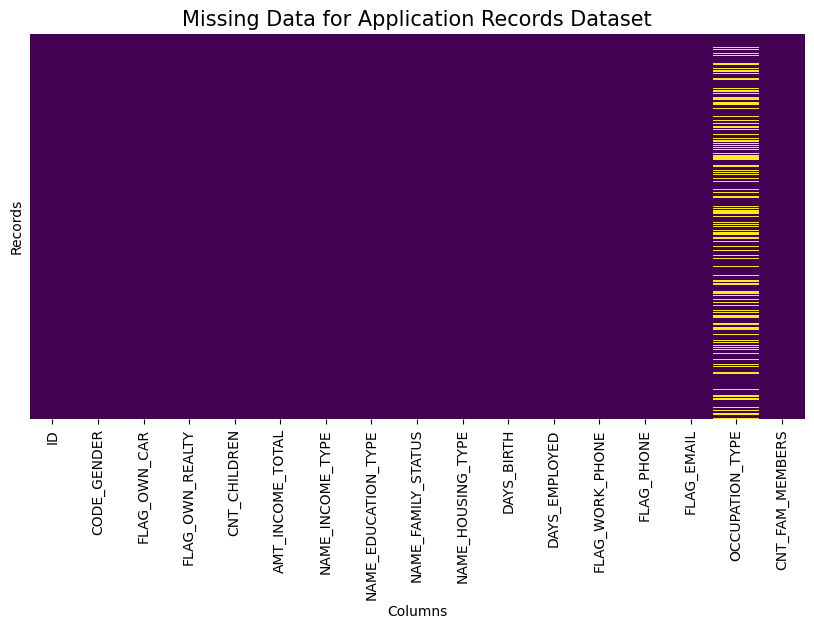

In [44]:
missing_data= app_data.isnull()
plt.figure(figsize=(10,5))
sns.heatmap(missing_data, cbar= False, yticklabels= False, cmap= 'viridis')
plt.title("Missing Data for Application Records Dataset", fontsize= 15)
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()

In [45]:
#From this heatmap we can interpret that column OCCUPATION_TYPE has highest null values.

In [46]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

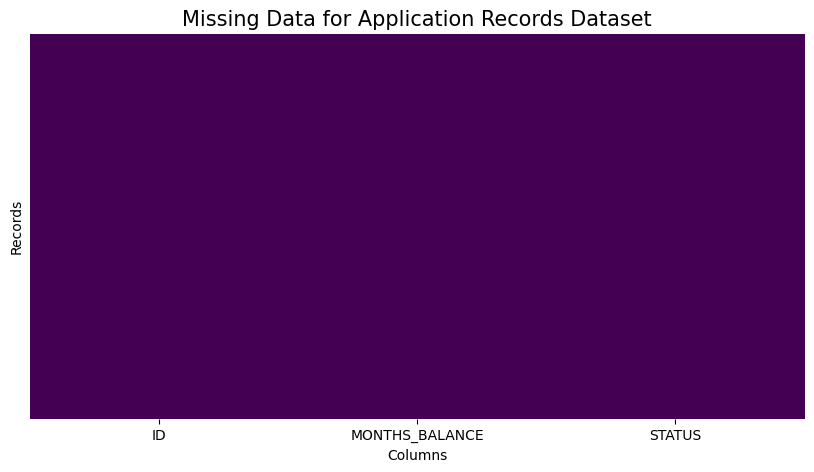

In [47]:
missing_data= credit_record.isnull()
plt.figure(figsize=(10,5))
sns.heatmap(missing_data, cbar= False, yticklabels= False, cmap= 'viridis')
plt.title("Missing Data for Application Records Dataset", fontsize= 15)
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()

In [48]:
#From the above heatmap we can see that there are no null values in the credit_record dataset

In [49]:
#Column OCCUPATION_TYPE has 27477 missing values. We cannot drop all these values because if we do we will loose large amount of data. Instead we will
#fill these values.

In [50]:
app_data['OCCUPATION_TYPE'].fillna(value= 'Other', inplace= True)

In [51]:
app_data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [52]:
#Target column

In [53]:
credit_record['STATUS'].nunique()

8

In [54]:
credit_record['target']= credit_record['STATUS']

In [55]:
credit_record['target'].replace("X", 0, inplace= True)
credit_record['target'].replace("C", 0, inplace= True)
credit_record['target']= credit_record['target'].astype(int)
credit_record

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [56]:
credit_record['target'].nunique()

6

In [57]:
credit_record.loc[credit_record['target']>=1, 'target']= 1

In [58]:
credit_record['target'].nunique()

2

In [59]:
#Here we have converted 8 categories into 2 categories. Here 'X' and 'C' = 0 means no risk and 1 is nothing but all the other categories.

In [60]:
# X : No Loan for the month
# C : Paid off that month
# 0 : 1-29 days past due
# 1 : 30-59 days past due
# 2 : 60-89 days past due
# 3 : 90-119 days past due
# 4 : 120-149 days past due
# 5 : Overdue or bad debts, write-offs for more than 150 days

In [61]:
df= pd.DataFrame(credit_record.groupby(['ID'])['target'].agg(max)).reset_index() #credit_record

In [62]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [63]:
new_df= pd.merge(app_data, df, how= 'inner', on= ['ID'])

In [64]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [65]:
new_df.shape

(9709, 18)

In [66]:
credit_record.head() 

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [67]:
# -10 (10 months back)
# -3 (3 months back)

In [68]:
start_df= pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
#renaming column MONTHS_BALANCE
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'},inplace=True)
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


In [69]:
#now let us convert these negative values of ACCOUNT_LENGHTH to positive values
start_df['ACCOUNT_LENGTH']= - start_df['ACCOUNT_LENGTH']
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [70]:
#Now we will add ACCOUNT_LENGTH column to new_df
new_df= pd.merge(new_df, start_df, how='inner', on=['ID'])

In [71]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5


In [72]:
app_data['DAYS_BIRTH']

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

In [73]:
#Now we are going to convert DAYS_BIRTH into years
new_df['AGE_YEARS']= round(-new_df['DAYS_BIRTH']/365.25,0)

In [74]:
new_df['AGE_YEARS']

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64

In [75]:
#Now we will drop DAYS_BIRTH column
new_df.drop(['DAYS_BIRTH'],axis= 1, inplace= True)

In [76]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0


In [77]:
# DE -ve(1000)---> EMPLOYED-->0
# DE +ve(1000)---> UNEMPLOYED--> 1

In [78]:
new_df['UNEMPLOYED']= 0
new_df.loc[-new_df['DAYS_EMPLOYED']<0, 'UNEMPLOYED'] = 1

In [79]:
new_df['DAYS_EMPLOYED']

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

In [80]:
#Now we are going to convert YEARS_EMPLOYED into years of experience
new_df['YEARS_EMPLOYED']= round(-new_df['DAYS_EMPLOYED']/365.25,0)

In [81]:
new_df['YEARS_EMPLOYED']

0         12.0
1          3.0
2          8.0
3      -1000.0
4          2.0
         ...  
9704       1.0
9705       7.0
9706       5.0
9707       4.0
9708       3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

In [82]:
#Now if YEARS_EMPLOYED is less than 0 i.e., negative value then it will return 0 otherwise it will take the actual values from YEARS_EMPLOYED column
new_df.loc[new_df['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED']= 0

In [83]:
new_df['YEARS_EMPLOYED']

0       12.0
1        3.0
2        8.0
3        0.0
4        2.0
        ... 
9704     1.0
9705     7.0
9706     5.0
9707     4.0
9708     3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

In [84]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'target', 'ACCOUNT_LENGTH', 'AGE_YEARS',
       'UNEMPLOYED', 'YEARS_EMPLOYED'],
      dtype='object')

In [85]:
#Renaming the columns
new_df= new_df.rename(columns= {'CODE_GENDER':'Gender', 'FLAG_OWN_CAR':'Own_car', 'FLAG_OWN_REALTY':'Own_property', 'CNT_CHILDREN':'Num_children',
       'AMT_INCOME_TOTAL':'Total_income', 'NAME_INCOME_TYPE':'Income_type', 'NAME_EDUCATION_TYPE':'Education_type',
       'NAME_FAMILY_STATUS':'Family_status', 'NAME_HOUSING_TYPE':'Housing_type', 'FLAG_WORK_PHONE':'Work_phone',
       'FLAG_PHONE':'Phone', 'FLAG_EMAIL':'Email', 'OCCUPATION_TYPE':'Occupation_type', 'CNT_FAM_MEMBERS':'Num_family',
       'target':'Target', 'ACCOUNT_LENGTH':'Account_length', 'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed',
       'YEARS_EMPLOYED':'Years_employed'})

In [86]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [87]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
DAYS_EMPLOYED        int64
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [88]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,

    "axes.grid":True,

    "grid.linestyle": "-",

    "axes.titlesize" : 13,

    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

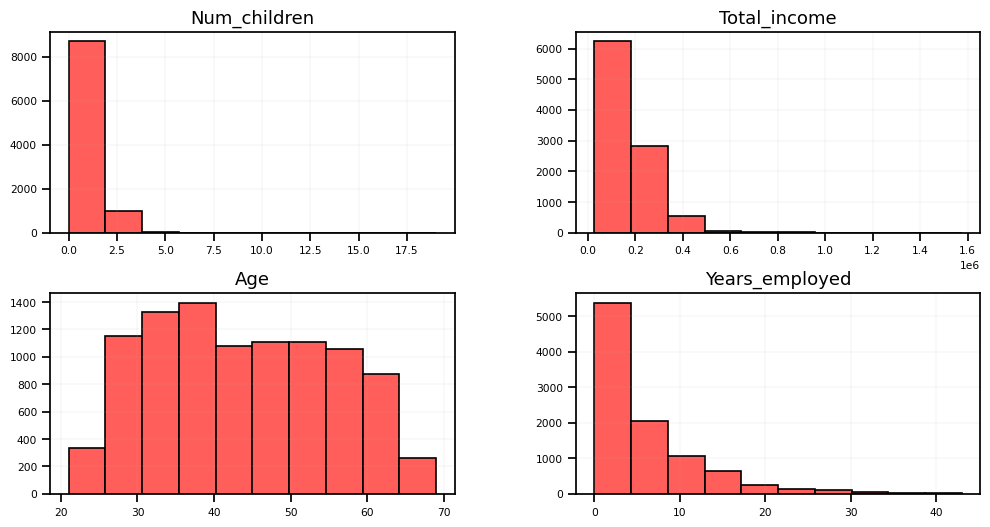

In [89]:
plt.figure(figsize=(10,10))
cols_to_plot= ['Num_children', 'Total_income', 'Age', 'Years_employed']
new_df[cols_to_plot].hist(edgecolor= 'black', linewidth= 1.2)
fig= plt.gcf()
fig.set_size_inches(12,6)

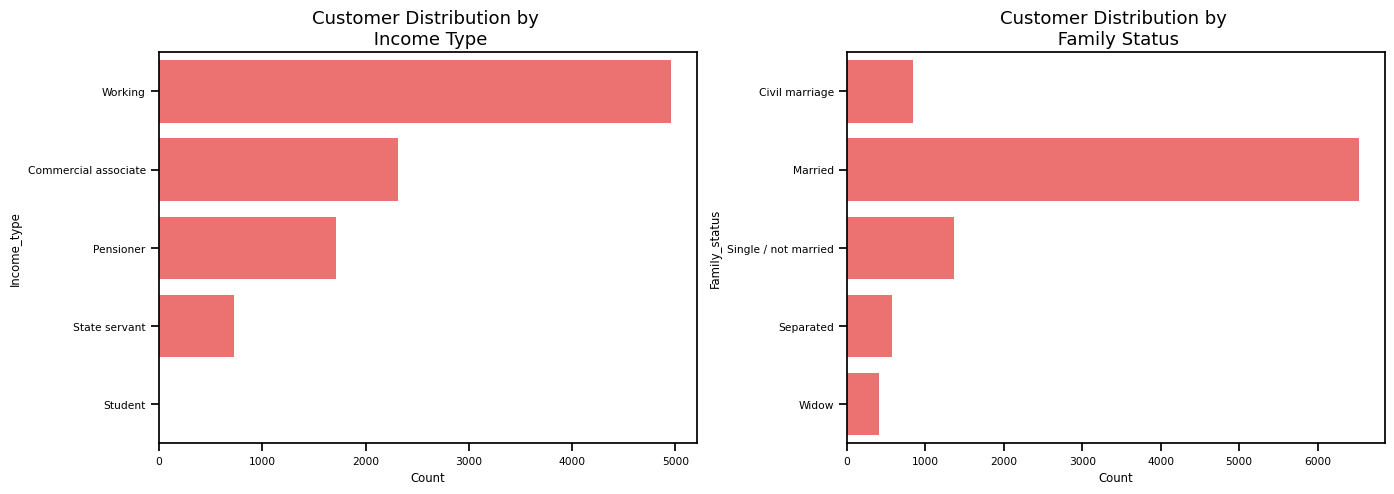

In [90]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])

g1.set_title("Customer Distribution by \n Income Type")

g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])

g2.set_title("Customer Distribution by \n Family Status")

g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

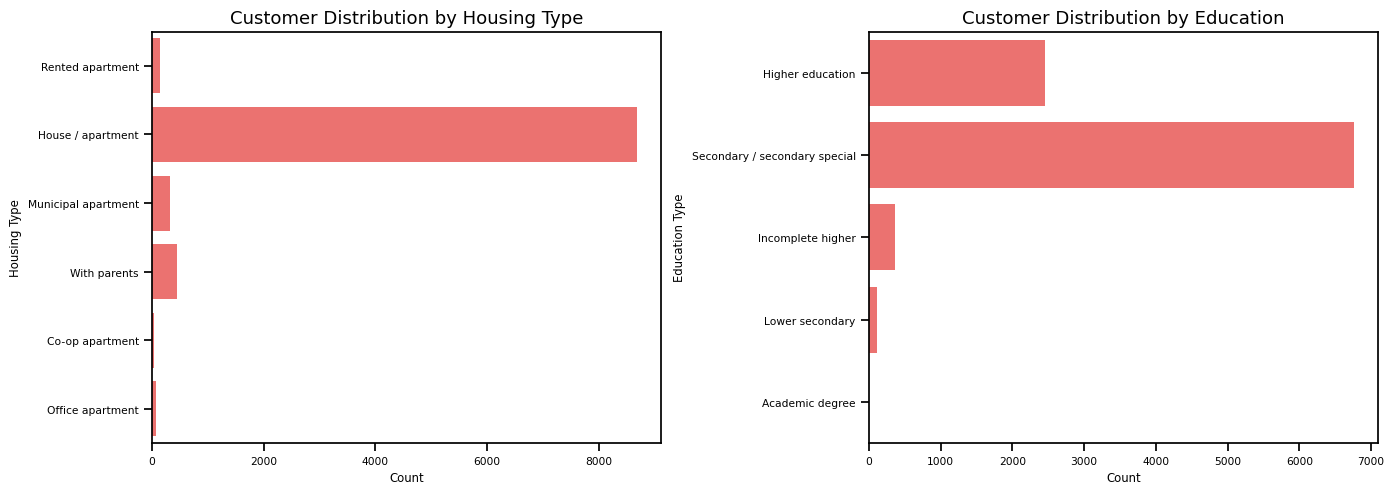

In [91]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=new_df.Education_type, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

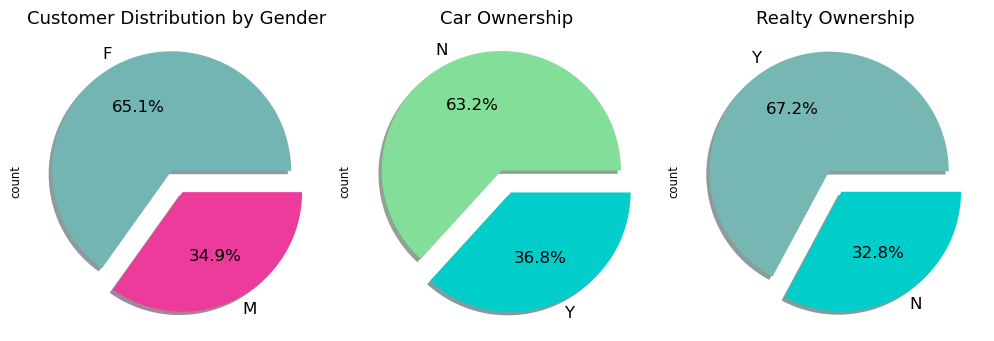

In [92]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])

g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])

g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])

g3.set_title("Realty Ownership")

fig.set_size_inches(10,5)

plt.tight_layout()

plt.show()

In [93]:
 new_df.head()   

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [94]:
#Encoding
#Convert categorical columns to numerical columns

In [95]:
object_columns= new_df.columns[new_df.dtypes == 'object'].tolist()  

for i in object_columns:
    print(f'Column {i}',new_df[i].nunique())

Column Gender 2
Column Own_car 2
Column Own_property 2
Column Income_type 5
Column Education_type 5
Column Family_status 5
Column Housing_type 6
Column Occupation_type 19


In [96]:
for i in new_df.columns[(new_df.dtypes=='object').values].tolist():
    print(i, '\n')
    print(new_df[i].value_counts())
    print('-------------'*5)

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
-----------------------------------------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
-----------------------------------------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
-----------------------------------------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-----------------------------------------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-----------------------------------------------------------------
Family_status 

Family_st

In [97]:
new_df['Gender']= new_df['Gender'].replace(['F', 'M'],[0,1])
new_df['Own_car']= new_df['Own_car'].replace(['Y', 'N'],[1,0])
new_df['Own_property']= new_df['Own_property'].replace(['Y', 'N'],[1,0])

In [98]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [99]:
new_df['Is_Working']= new_df['Income_type'].replace(['Working', 'Commercial associate', 'State servant', 'Pensioner', 'Student'], [1,1,1,0,0])

In [100]:
new_df['Marital_status']= new_df['Family_status'].replace(['Married', 'Civil marriage', 'Single / not married', 'Separated', 'Widow'], [1,1,0,0,0])

In [101]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [102]:
housing_type = { 'House / apartment': 'House / apartment',

                'With parents': 'With parents',

'Municipal apartment' : 'House / apartment',

'Rented apartment' : 'House / apartment',

'Office apartment' : 'House / apartment',

'Co-op apartment' : 'House / apartment'}

In [103]:
new_df['Housing_type']= new_df['Housing_type'].map(housing_type)

In [104]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [105]:
family_status = { 'Married' : 'Married',

'Single / not married' : 'Single',

'Civil marriage': 'Married',

'Separated': 'Single',

'Widow':'Single'}

In [106]:
new_df['Family_status']= new_df['Family_status'].map(family_status)

In [107]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [108]:
income_type = {'Working' : 'Working',

'Commercial associate' : 'Working',

'Pensioner' : 'Pensioner',

'State servant' : 'Working',

'Student' : 'Student'}

In [109]:
new_df['Income_type'] = new_df['Income_type'].map(income_type)

In [110]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Working,Secondary / secondary special,Single,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [111]:
education_type = {'Secondary / secondary special' : 'secondary',

'Higher education': 'Higher education',

'Incomplete higher': 'Higher education',

'Lower secondary' : 'secondary',

'Academic degree': 'Academic degree'}

In [112]:
new_df['Education_type'] = new_df['Education_type'].map(education_type)

In [113]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [114]:
#To get the number of members in one house
#If Marital status is 0 -it means single- so number of people will be 1
#If Marital status is 1- it means they are married- so number of people will be 2

In [115]:
new_df['Household_size']= new_df['Num_children'] + new_df['Marital_status'].apply(lambda x:2 if x==1 else 1)

In [116]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,0,5,46.0,0,2.0,1,1,2


In [117]:
#Finding outliers

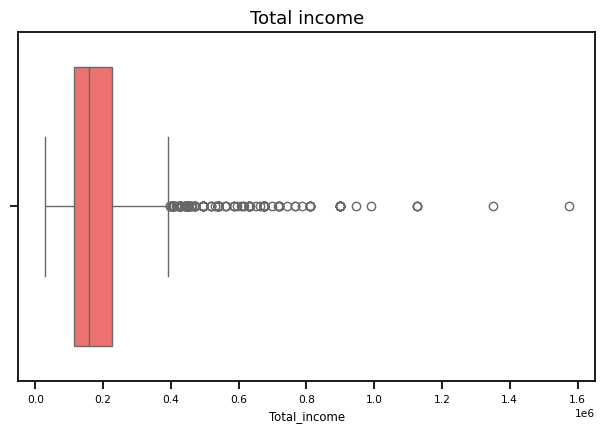

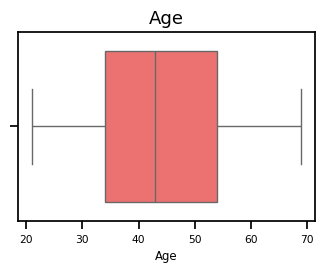

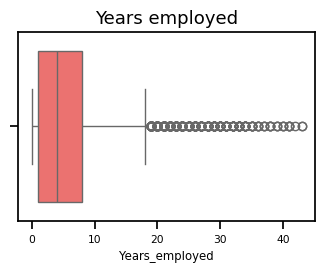

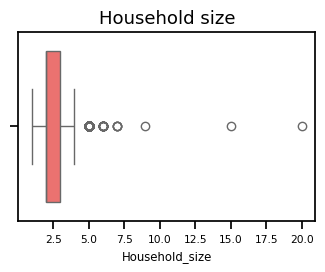

In [118]:
numerical_cols = ['Total_income', 'Age', 'Years_employed', 'Household_size']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=new_df[col])
    plt.title(col.replace("_", " "))
    plt.tight_layout()
    plt.show()

In [119]:
new_df[(new_df['Years_employed']==43)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size
7142,5112905,0,0,1,0,180000.0,Working,secondary,Married,House / apartment,...,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,2
9328,5148702,0,0,1,0,126000.0,Working,secondary,Married,House / apartment,...,Core staff,2.0,0,57,62.0,0,43.0,1,1,2


<Axes: ylabel='Num_children'>

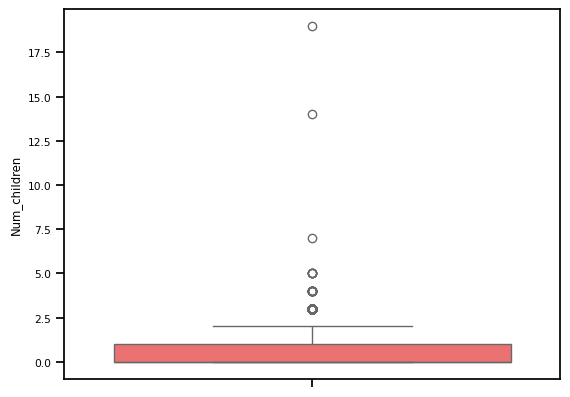

In [120]:
sns.boxplot(new_df['Num_children'])

In [121]:
#We will look for the higher bound and lower bound in the above boxplot i.e., Num_children
high_bound= new_df['Num_children'].quantile(0.999)
print('High bound', high_bound)
low_bound= new_df['Num_children'].quantile(0.001)
print('Low bound', low_bound)

High bound 4.0
Low bound 0.0


In [122]:
#Values above 4.0 are considered as outliers

In [123]:
new_df= new_df[(new_df['Num_children']>=low_bound) & (new_df['Num_children']<=high_bound)]

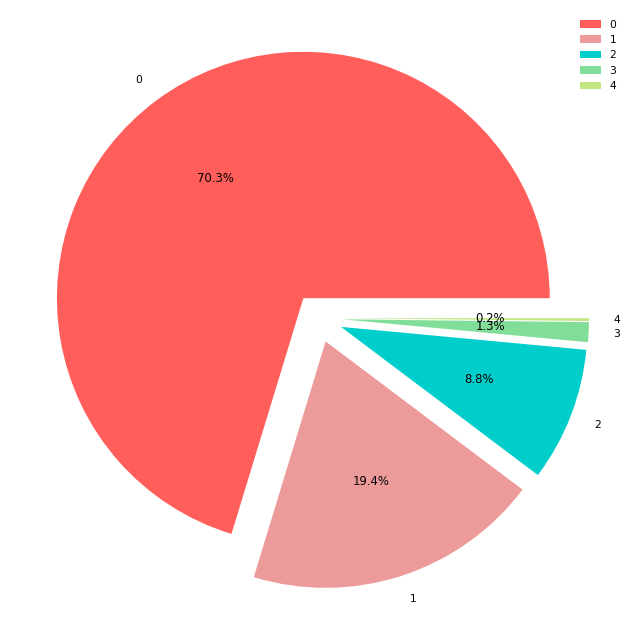

In [124]:
plt.figure(figsize=(8,8))
plt.pie(new_df['Num_children'].value_counts(), labels= new_df['Num_children'].value_counts().index, explode= [0.1,0.1,0.1,0.1,0.1], autopct="%1.1f%%")
plt.title=('% of Applications submitted based on children count')
plt.legend()
plt.show()

In [125]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'DAYS_EMPLOYED', 'Work_phone', 'Phone', 'Email',
       'Occupation_type', 'Num_family', 'Target', 'Account_length', 'Age',
       'Unemployed', 'Years_employed', 'Is_Working', 'Marital_status',
       'Household_size'],
      dtype='object')

In [126]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [127]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_size'],
      dtype='object')

In [128]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,0,5,46.0,0,2.0,1,1,2


In [129]:
#By looking at the above data we can see that our taget column is in between
#So now we will re_arrange the columns and bring target to the last so that we can easily build model further

In [130]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_size'],
      dtype='object')

In [131]:
new_df= new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_size', 'Target']]

In [132]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,5,46.0,0,2.0,1,1,2,0


In [133]:
#Now we can see the target column is at the last

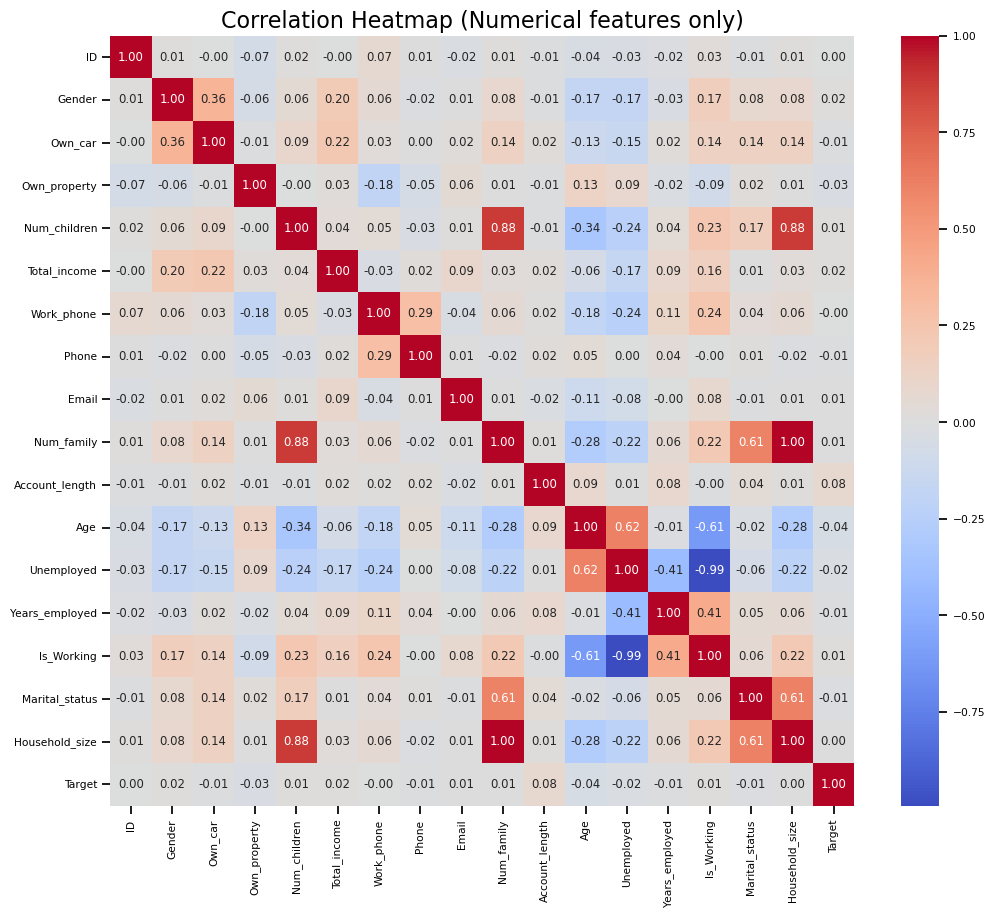

In [134]:
numerical_df= new_df.select_dtypes(include = ['number'])
corr= numerical_df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
ax.set_title("Correlation Heatmap (Numerical features only)", fontsize=16)
plt.show()
 

In [135]:
#From looking at the above heatmap we can decide which features to be dropped as it won't give any relevant details

In [136]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Unemployed', 'Years_employed',
       'Is_Working', 'Marital_status', 'Household_size', 'Target'],
      dtype='object')

In [137]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,5,46.0,0,2.0,1,1,2,0


In [138]:
#Create a pie-chart on how much % of applications approved based on gender

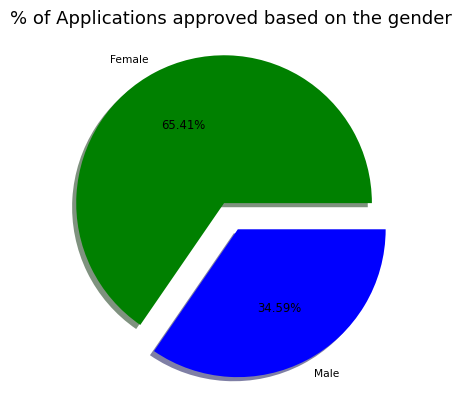

In [139]:
fig, ax = plt.subplots()
ax.pie(
    new_df[new_df['Target']==0]['Gender'].value_counts(),
    explode=[0.1,0.1], shadow=True,
    labels=['Female', 'Male'],
    autopct='%1.2f%%',
    colors=['green','blue']
)
ax.set_title("% of Applications approved based on the gender")
plt.show()

In [140]:
#To check the target distribution in target column

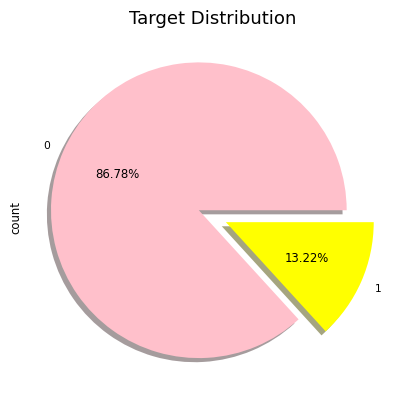

In [141]:
ax = new_df['Target'].value_counts().plot.pie(
    explode=[0.1,0.1],
    shadow=True,
    autopct='%1.2f%%',
    colors=['pink','yellow']
)
ax.set_title("Target Distribution")
plt.show()

In [142]:
#From the above pie-chart we can interpret that 86.78% represents O category in target column and 13.22% represents 1 category in target column

In [143]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9701 entries, 0 to 9708
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9701 non-null   int64  
 1   Gender           9701 non-null   int64  
 2   Own_car          9701 non-null   int64  
 3   Own_property     9701 non-null   int64  
 4   Num_children     9701 non-null   int64  
 5   Total_income     9701 non-null   float64
 6   Income_type      9701 non-null   object 
 7   Education_type   9701 non-null   object 
 8   Family_status    9701 non-null   object 
 9   Housing_type     9701 non-null   object 
 10  Work_phone       9701 non-null   int64  
 11  Phone            9701 non-null   int64  
 12  Email            9701 non-null   int64  
 13  Occupation_type  9701 non-null   object 
 14  Num_family       9701 non-null   float64
 15  Account_length   9701 non-null   int64  
 16  Age              9701 non-null   float64
 17  Unemployed       97

In [144]:
#To check the columns which has object dtype

In [145]:
colname= []
for x in new_df.columns:
    if new_df[x].dtype== 'object':
        colname.append(x)

In [146]:
colname

['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [147]:
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'ID': array([5008804, 5008806, 5008808, ..., 5149729, 5149838, 5150337],
      dtype=int64)}
{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([1, 0], dtype=int64)}
{'Own_property': array([1, 0], dtype=int64)}
{'Num_children': array([0, 1, 3, 2, 4], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  31

In [148]:
#Converting the above categorical columns into numerical columns using label encoder

In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in colname:
    new_df[x]= le.fit_transform(new_df[x])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}


In [150]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_size,Target
0,5008804,1,1,1,0,427500.0,2,1,0,0,...,12,2.0,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,2,2,0,0,...,17,2.0,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,2,2,1,0,...,15,1.0,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,0,1,1,0,...,12,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,2,1,0,0,...,0,2.0,5,46.0,0,2.0,1,1,2,0


In [151]:
#So from the abpve features we can see that now there is no categorical column

In [152]:
#Now we will seperate X & Y

In [153]:
X= new_df.iloc[:, 0:-1]
Y= new_df.iloc[:, -1]

In [154]:
print(X.shape)
print(Y.shape)

(9701, 22)
(9701,)


In [155]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [156]:
X

array([[-1.64903703,  1.3665918 ,  1.31164592, ...,  0.46341214,
         0.56381876, -0.19512984],
       [-1.64898801,  1.3665918 ,  1.31164592, ...,  0.46341214,
         0.56381876, -0.19512984],
       [-1.64893899, -0.7317474 , -0.76240087, ...,  0.46341214,
        -1.7736196 , -1.3086325 ],
       ...,
       [ 1.8049713 ,  1.3665918 ,  1.31164592, ...,  0.46341214,
         0.56381876, -0.19512984],
       [ 1.80764284, -0.7317474 , -0.76240087, ..., -2.15790634,
         0.56381876, -0.19512984],
       [ 1.8198731 ,  1.3665918 , -0.76240087, ...,  0.46341214,
        -1.7736196 , -1.3086325 ]])

In [157]:
#Scaling brings down all the columns into same range 

In [158]:
#Split data 

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 10)

In [160]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7760, 22)
(7760,)
(1941, 22)
(1941,)


In [161]:
#Modelling

In [162]:
#Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)

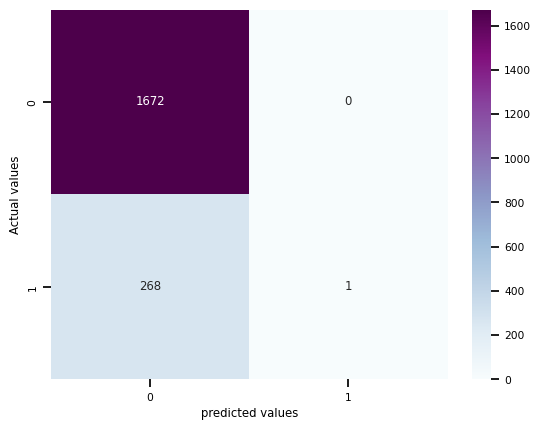

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       1.00      0.00      0.01       269

    accuracy                           0.86      1941
   macro avg       0.93      0.50      0.47      1941
weighted avg       0.88      0.86      0.80      1941

Accuracy of the model: 0.8619268418341062


In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

In [165]:
#Here 268 represents false negavtive and 0 represents false positive
#False negative means recall and false positive means precision

In [166]:
#KNN Classifier

In [167]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),

                                 metric = 'euclidean')

model_KNN.fit(X_train, Y_train)

Y_pred=model_KNN.predict(X_test) 

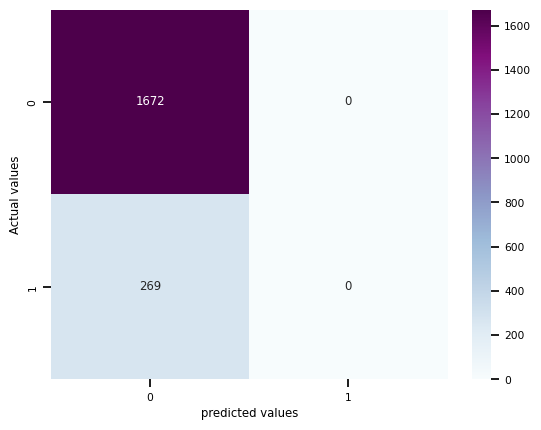

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model: 0.8614116434827409


In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

In [169]:
#SVM

In [170]:
from sklearn.svm import SVC
classifier= SVC(kernel = 'rbf', gamma= 0.1, C=1)
classifier.fit(X_train, Y_train)

Y_pred= classifier.predict(X_test)

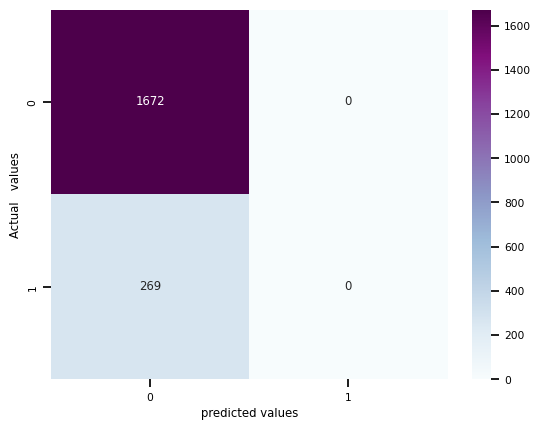

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model: 0.8614116434827409


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual   values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

In [172]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, random_state= 10)

model_DecisionTree.fit(X_train, Y_train)
Y_pred= model_DecisionTree.predict(X_test)


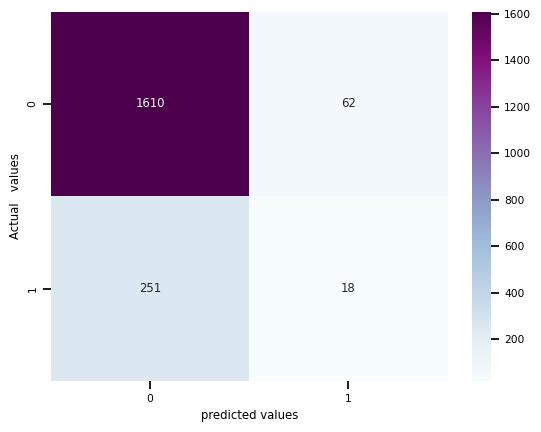

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1672
           1       0.23      0.07      0.10       269

    accuracy                           0.84      1941
   macro avg       0.55      0.51      0.51      1941
weighted avg       0.78      0.84      0.80      1941

Accuracy of the model: 0.8387429160226687


In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual   values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

In [174]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest= RandomForestClassifier(n_estimators= 50, random_state= 10)

model_RandomForest.fit(X_train, Y_train)
Y_pred= model_RandomForest.predict(X_test)

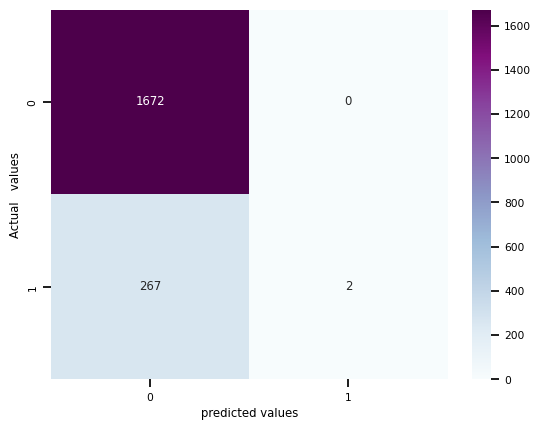

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       1.00      0.01      0.01       269

    accuracy                           0.86      1941
   macro avg       0.93      0.50      0.47      1941
weighted avg       0.88      0.86      0.80      1941

Accuracy of the model: 0.8624420401854714


In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual   values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

In [176]:
#Boosting techniques

In [177]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost= AdaBoostClassifier(estimator= DecisionTreeClassifier(random_state= 10),n_estimators= 100, random_state= 10)

model_AdaBoost.fit(X_train, Y_train)

Y_pred= model_AdaBoost.predict(X_test)

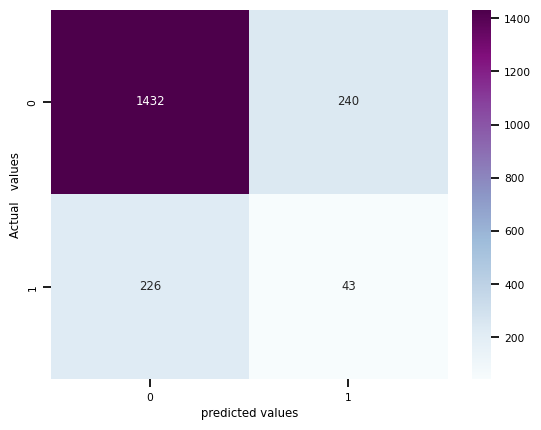

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1672
           1       0.15      0.16      0.16       269

    accuracy                           0.76      1941
   macro avg       0.51      0.51      0.51      1941
weighted avg       0.77      0.76      0.76      1941

Accuracy of the model: 0.7599175682637815


In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot= True, fmt='g', cbar= 'False', cmap= 'BuPu')
plt.xlabel('predicted values')
plt.ylabel('Actual   values')
plt.show() 

print('Classification Report')
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)           
print('Accuracy of the model:', acc)

# Inference

# From above different models build-up on the data we can observe that logistic Regression and KNN was working better in terms of recall even if the accuracy was not good.

# From logistic and KNN models we will choose KNN model as its recall was good enough as compared to other models. Type1 & Type2 errors also seemed to be comparetively good with respect to other models.